# Rotating Machine Predictive Maintenance Using Classification Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data=pd.read_csv("predictive_maintenance.csv")
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [17]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [18]:
data.describe(include='object')

,Product ID,Type,Failure Type
count,10000,10000,10000
unique,10000,3,6
top,L50542,L,No Failure
freq,1,6000,9652


## Exploratory data analysis

In [15]:
import quick_eda
from quick_eda.df_eda import df_eda

df_eda(data)

Head of dataframe:

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  
- - - - - - - - - - - - - - - - - - - - - - - -

Tail of dataframe:

    

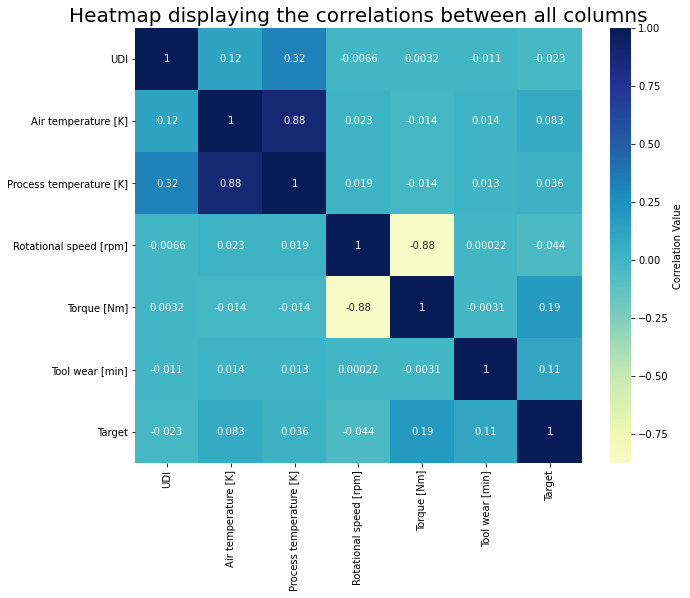

In [158]:
plt.figure(figsize=(10,8))
plt.title("Heatmap displaying the correlations between all columns", fontsize=20)
sns.heatmap(data.corr(),center=0, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Correlation Value'})
plt.show()

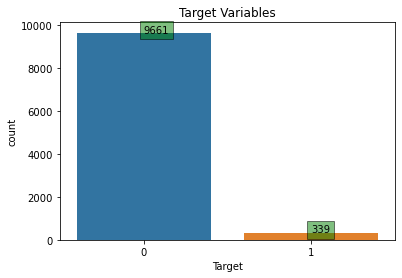

In [25]:
# Target are very unbalanced. 96.61% of the datasets are no failure and 3.39% of the datasets are failure.

g=sns.countplot(x='Target', data=data)
for i, u in enumerate(data['Target'].value_counts().values):
    g.text(i, u, str(u), bbox=dict(facecolor='green', alpha=0.5))
plt.title('Target Variables')
plt.show()

In [28]:
data['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

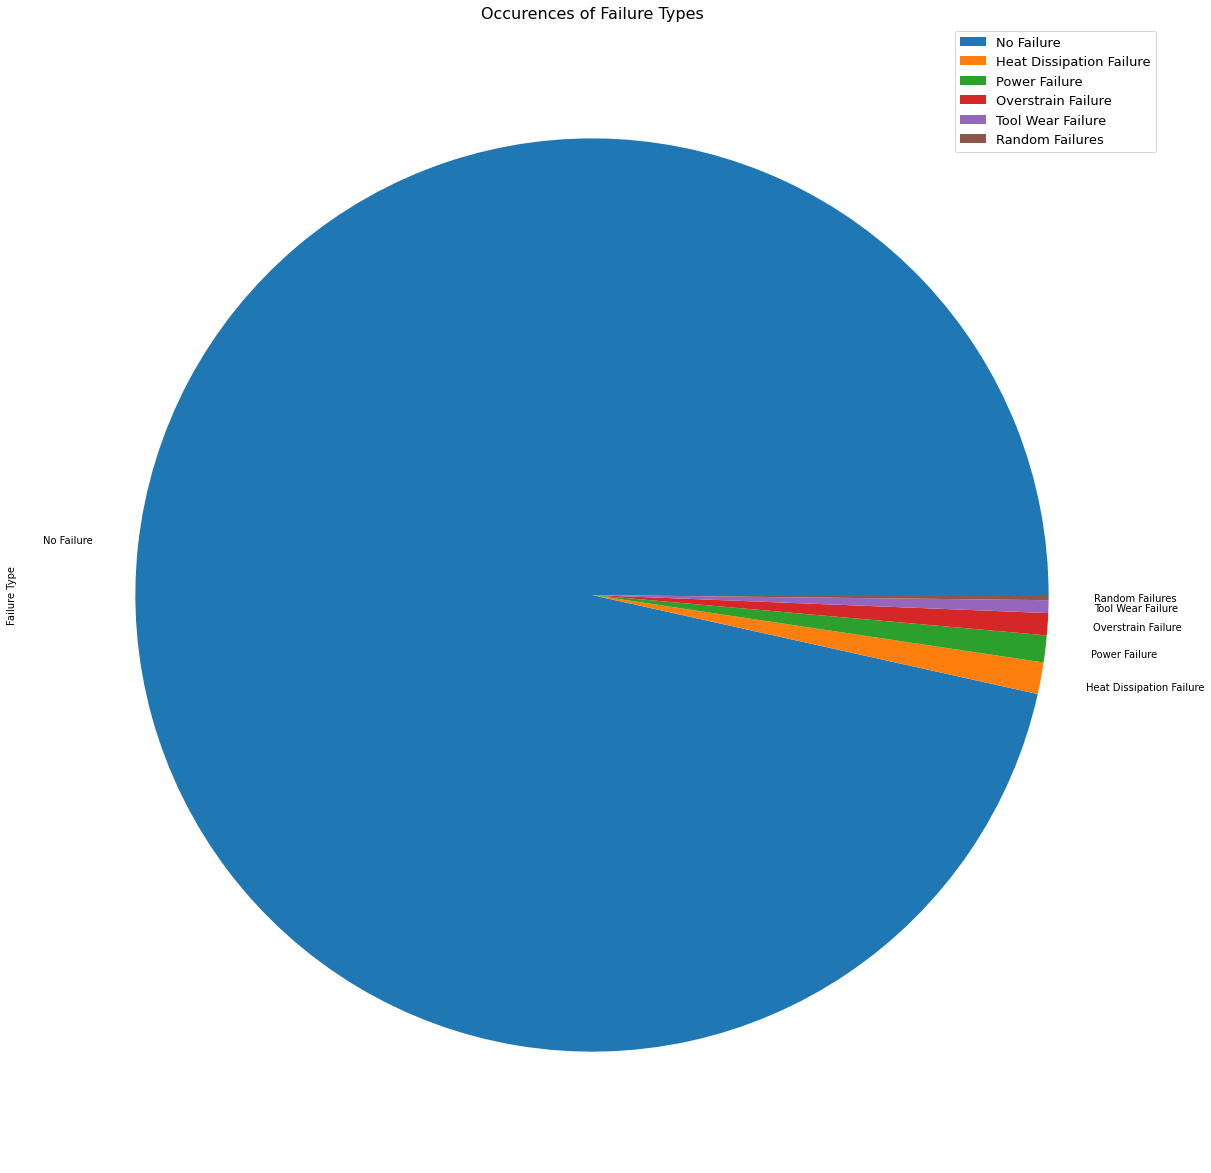

In [32]:
vc = data["Failure Type"].value_counts()

plt.title("Occurences of Failure Types", fontsize=16)

labels = ["No Failure", "Heat Dissipation Failure", "Power Failure", "Overstrain Failure", "Tool Wear Failure", "Random Failures"]

vc.plot(kind="pie", figsize=(21,21), startangle=360)

plt.legend(fontsize=13)
plt.show()

In [142]:
vc1["Failure Type"].describe()

count                          348
unique                           5
top       Heat Dissipation Failure
freq                           112
Name: Failure Type, dtype: object

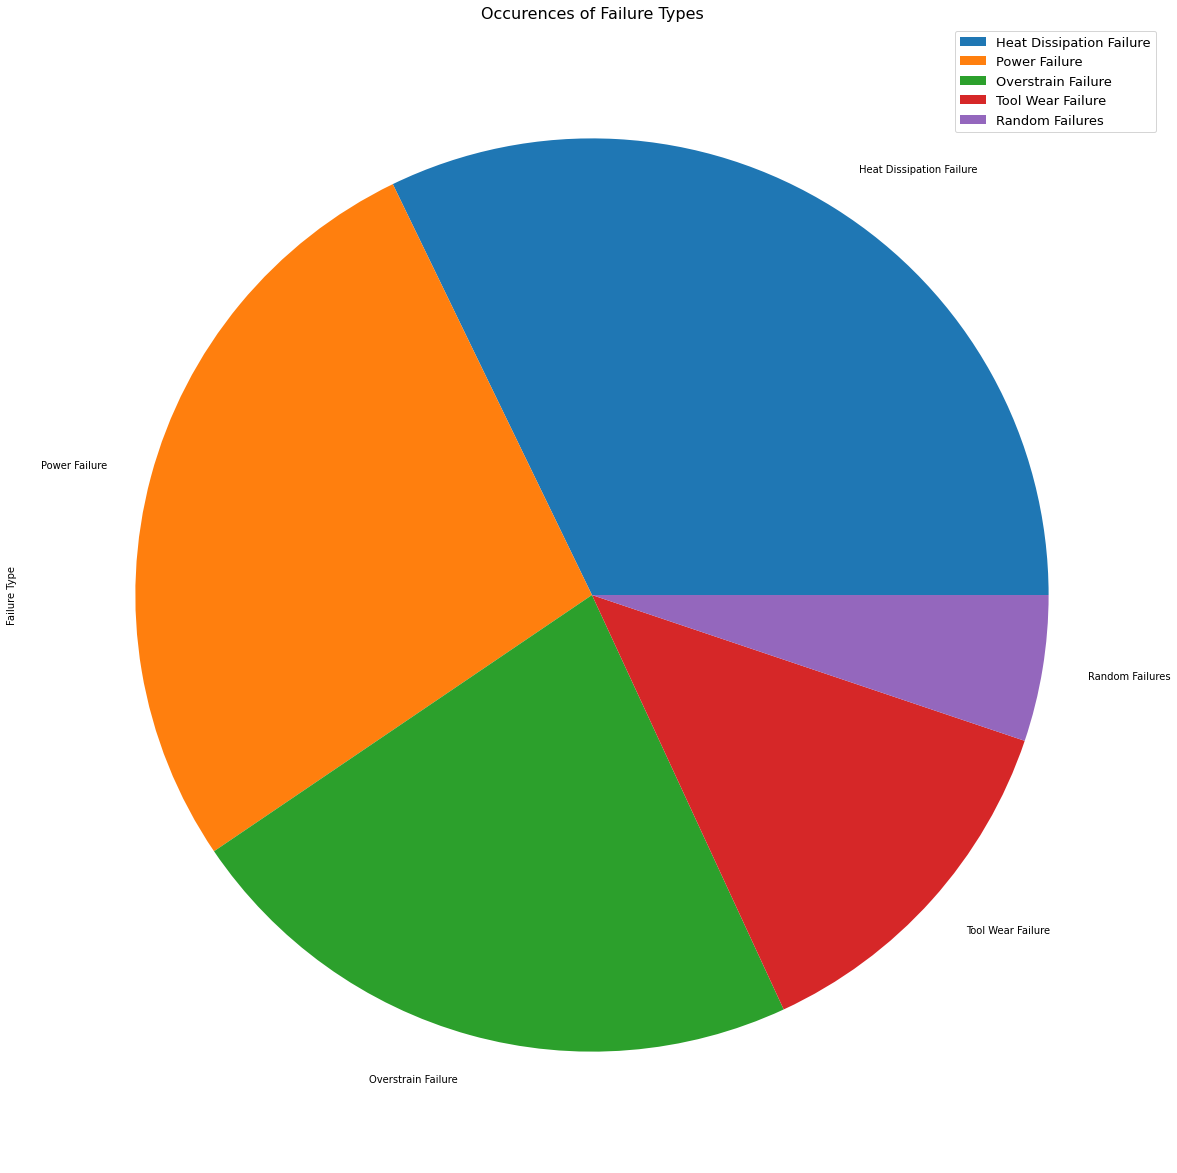

In [151]:
vc1 = data[data["Failure Type"] != 'No Failure']

vc1 = vc1["Failure Type"].value_counts()

plt.title("Occurences of Failure Types", fontsize=16)

#labels = ["Heat Dissipation Failure", "Power Failure", "Overstrain Failure", "Tool Wear Failure", "Random Failures"]

vc1.plot(kind="pie", figsize=(21,21), startangle=360,)

plt.legend(fontsize=13)
plt.show()

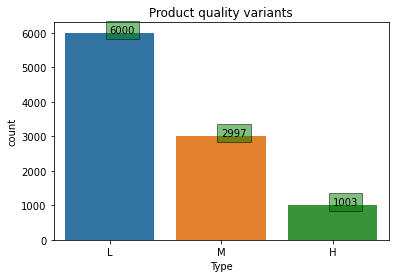

In [135]:
#Product with low quality is dominant in numbers of entries

s = sns.countplot(data=data, x= 'Type', order=['L','M','H'])
for i, u in enumerate(data['Type'].value_counts().values):
    s.text(i, u, str(u), bbox=dict(facecolor='green', alpha=0.5))
plt.title('Product quality variants')
plt.show()

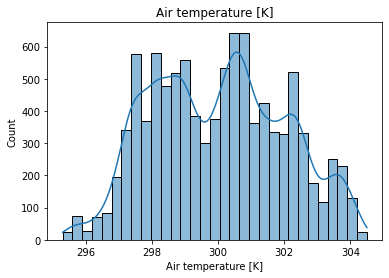

In [89]:
sns.histplot(data=data['Air temperature [K]'],kde=True)
plt.title('Air temperature [K]')
plt.show()

C:\Users\C022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


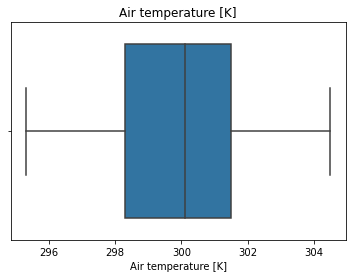

In [96]:
# No Outlier exist
sns.boxplot(data['Air temperature [K]'])
plt.title('Air temperature [K]')
plt.show()

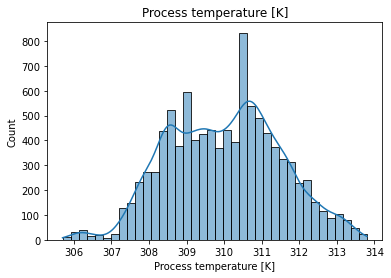

In [99]:
sns.histplot(data=data['Process temperature [K]'],kde=True)
plt.title('Process temperature [K]')
plt.show()

C:\Users\C022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


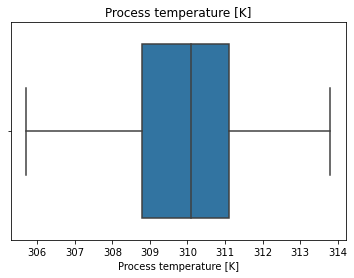

In [100]:
# No Outlier exist
sns.boxplot(data['Process temperature [K]'])
plt.title('Process temperature [K]')
plt.show()

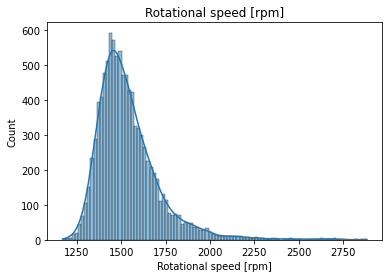

In [111]:
sns.histplot(data=data['Rotational speed [rpm]'],kde=True)
plt.title('Rotational speed [rpm]')
plt.show()

C:\Users\C022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


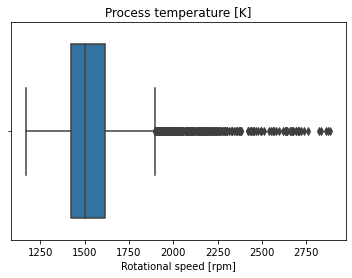

In [112]:
# A lot of outlier exist in rotational speed data

sns.boxplot(data['Rotational speed [rpm]'])
plt.title('Process temperature [K]')
plt.show()

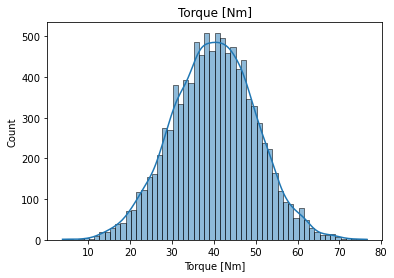

In [124]:
sns.histplot(data=data['Torque [Nm]'],kde=True)
plt.title('Torque [Nm]')
plt.show()

C:\Users\C022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


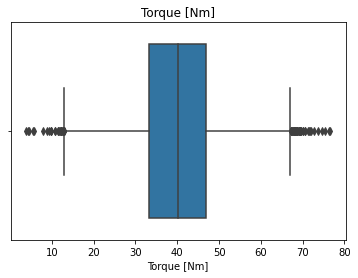

In [125]:
# A lot of outlier exist in torque data

sns.boxplot(data['Torque [Nm]'])
plt.title('Torque [Nm]')
plt.show()

In [126]:
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

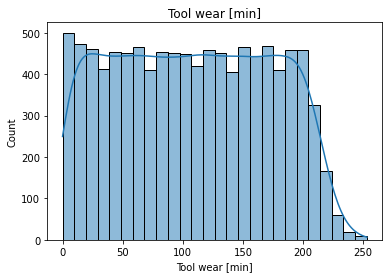

In [127]:
sns.histplot(data=data['Tool wear [min]'],kde=True)
plt.title('Tool wear [min]')
plt.show()

C:\Users\C022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Tool wear [min]')

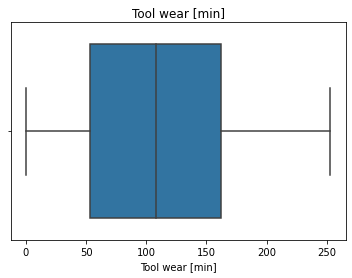

In [128]:
# No Outlier exist

sns.boxplot(data['Tool wear [min]'])
plt.title('Tool wear [min]')


## Data Preparation For Machine Learning

In [165]:
from sklearn import preprocessing

data["Type"] = data["Type"].astype("str")
data["Failure Type"] = data["Failure Type"].astype("str")

number = preprocessing.LabelEncoder()

data["Type"] = number.fit_transform(data["Type"])
data["Failure Type"] = number.fit_transform(data["Failure Type"])

data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,1
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,1
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,1
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,1
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,1


In [175]:
from sklearn.model_selection import train_test_split

X = data[['Type', 'Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]','Tool wear [min]']].values
y1 = data[['Target']].values
X_train, X_test, y_train, y_test = train_test_split(X, y1, random_state = 40)

## Modeling / Machine Learning

In [183]:
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [176]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [184]:
from sklearn.linear_model import LogisticRegression

logr_param_grid = {'C': [0.001, 0.004, 0.01, 0.1, 0.4, 1, 10, 50, 100],
                   'penalty' : ['l1', 'l2'],
                   'fit_intercept': [True, False]}

logr_grid = GridSearchCV(LogisticRegression(solver='liblinear'), 
                        logr_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
logr_grid.fit(X_train, y_train)
print('LogisticRegression Best parameters', logr_grid.best_params_)
logr_model = logr_grid.best_estimator_
print('LogisticRegression best score = ',logr_grid.best_score_ )

logr_pred = logr_model.predict(X_test)
print('Logistic Regression best model confusion matrix on test data  \n',confusion_matrix(y_test, logr_pred)  )
print('*********************************************')
print('Logistic Regression best model Precision  on test data = {:.2f}'.format(precision_score(y_test, logr_pred)))
print('Logistic Regression best model Recall on test data = {:.2f}'.format(recall_score(y_test, logr_pred)))
print('Logistic Regression best model F1 on test data  = {:.2f}'.format(f1_score(y_test, logr_pred)))
print('Logistic Regression best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, logr_pred)))
print('*********************************************')

LogisticRegression Best parameters {'C': 50, 'fit_intercept': True, 'penalty': 'l1'}
LogisticRegression best score =  0.8908131368489425
Logistic Regression best model confusion matrix on test data  
 [[2410    6]
 [  67   17]]
*********************************************
Logistic Regression best model Precision  on test data = 0.74
Logistic Regression best model Recall on test data = 0.20
Logistic Regression best model F1 on test data  = 0.32
Logistic Regression best model Accuracy  on test data = 0.97
*********************************************


### Decision Tree

In [182]:
from sklearn.tree import DecisionTreeClassifier

dt_param_grid = {'max_depth': np.arange(1, 10)}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                        dt_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
dt_grid.fit(X_train, y_train)
print('DecisionTree Best parameters', dt_grid.best_params_)
dt_model = dt_grid.best_estimator_
print('DecisionTree best score = ',dt_grid.best_score_ )

dt_pred = dt_model.predict(X_test)
print('Decision Tree best model confusion matrix on test data  \n',confusion_matrix(y_test, dt_pred)  )
print('*********************************************')
print('Decision Tree best model Precision  on test data = {:.2f}'.format(precision_score(y_test, dt_pred)))
print('Decision Tree best model Recall on test data = {:.2f}'.format(recall_score(y_test, dt_pred)))
print('Decision Tree best model F1 on test data  = {:.2f}'.format(f1_score(y_test, dt_pred)))
print('Decision Tree best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, dt_pred)))
print('*********************************************')

DecisionTree Best parameters {'max_depth': 4}
DecisionTree best score =  0.9102721281749414
Decision Tree best model confusion matrix on test data  
 [[2412    4]
 [  60   24]]
*********************************************
Decision Tree best model Precision  on test data = 0.86
Decision Tree best model Recall on test data = 0.29
Decision Tree best model F1 on test data  = 0.43
Decision Tree best model Accuracy  on test data = 0.97
*********************************************


### KNN

In [181]:
from sklearn.neighbors import KNeighborsClassifier

knn_param_grid = {'n_neighbors': np.arange(1, 30),
                  'p': [1,2],
                 'weights':['uniform','distance']}
                   

knn_grid = GridSearchCV(KNeighborsClassifier(), 
                        knn_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
knn_grid.fit(X_train, y_train)
print('Knn Best parameters', knn_grid.best_params_)
knn_model = knn_grid.best_estimator_
knn_model.fit(X_train, y_train)
print('Knn best score = ',knn_grid.best_score_ )

knn_pred = knn_model.predict(X_test)
print('Knn best model confusion matrix on test data  \n',confusion_matrix(y_test, knn_pred)  )
print('*********************************************')
print('Knn best model Precision  on test data = {:.2f}'.format(precision_score(y_test, knn_pred)))
print('Knn best model Recall  on test data = {:.2f}'.format(recall_score(y_test, knn_pred)))
print('Knn best model F1 on test data = {:.2f}'.format(f1_score(y_test, knn_pred)))
print('Knn best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, knn_pred)))
print('*********************************************')

Knn Best parameters {'n_neighbors': 24, 'p': 1, 'weights': 'distance'}
Knn best score =  0.9280707452062952
Knn best model confusion matrix on test data  
 [[2415    1]
 [  74   10]]
*********************************************
Knn best model Precision  on test data = 0.91
Knn best model Recall  on test data = 0.12
Knn best model F1 on test data = 0.21
Knn best model Accuracy  on test data = 0.97
*********************************************


### Support Vector Machine

In [185]:
from sklearn.svm import SVC

svc_param_grid = {'C': [0.001, 0.004, 0.01, 0.1, 0.4, 1, 10, 50, 100],
                  'kernel' : ['linear', 'rbf'],
                  'gamma': [0.001, 0.004, 0.01, 0.1, 0.4, 1, 10, 50, 100]}

svc_grid = GridSearchCV(SVC(), 
                        svc_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
svc_grid.fit(X_train, y_train)
print('SVC Best parameters', svc_grid.best_params_)
svc_model = svc_grid.best_estimator_
print('SVC best score = ',svc_grid.best_score_ )

svc_pred = svc_model.predict(X_test)
print('SVC best model confusion matrix on test data  \n',confusion_matrix(y_test, svc_pred)  )
print('*********************************************')
print('SVC best model Precision  on test data = {:.2f}'.format(precision_score(y_test, svc_pred)))
print('SVC best model Recall on test data = {:.2f}'.format(recall_score(y_test, svc_pred)))
print('SVC best model F1 on test data  = {:.2f}'.format(f1_score(y_test, svc_pred)))
print('SVC best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, svc_pred)))
print('*********************************************')

KeyboardInterrupt: 

## Predicting the Type of failure

In [ ]:
y2 = data[['Failure Type']].values
X_train, X_test, y_train, y_test = train_test_split(X, y2, random_state = 40)

### Logistic Regression

In [ ]:
logr_param_grid = {'C': [0.001, 0.004, 0.01, 0.1, 0.4, 1, 10, 50, 100],
                   'penalty' : ['l1', 'l2'],
                   'fit_intercept': [True, False]}

logr_grid = GridSearchCV(LogisticRegression(solver='liblinear'), 
                        logr_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
logr_grid.fit(X_train, y_train)
print('LogisticRegression Best parameters', logr_grid.best_params_)
logr_model = logr_grid.best_estimator_
print('LogisticRegression best score = ',logr_grid.best_score_ )

logr_pred = logr_model.predict(X_test)
print('Logistic Regression best model confusion matrix on test data  \n',confusion_matrix(y_test, logr_pred)  )
print('*********************************************')
print('Logistic Regression best model Precision  on test data = {:.2f}'.format(precision_score(y_test, logr_pred)))
print('Logistic Regression best model Recall on test data = {:.2f}'.format(recall_score(y_test, logr_pred)))
print('Logistic Regression best model F1 on test data  = {:.2f}'.format(f1_score(y_test, logr_pred)))
print('Logistic Regression best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, logr_pred)))
print('*********************************************')

### Decision Tree

In [ ]:
dt_param_grid = {'max_depth': np.arange(1, 10)}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                        dt_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
dt_grid.fit(X_train, y_train)
print('DecisionTree Best parameters', dt_grid.best_params_)
dt_model = dt_grid.best_estimator_
print('DecisionTree best score = ',dt_grid.best_score_ )

dt_pred = dt_model.predict(X_test)
print('Decision Tree best model confusion matrix on test data  \n',confusion_matrix(y_test, dt_pred)  )
print('*********************************************')
print('Decision Tree best model Precision  on test data = {:.2f}'.format(precision_score(y_test, dt_pred)))
print('Decision Tree best model Recall on test data = {:.2f}'.format(recall_score(y_test, dt_pred)))
print('Decision Tree best model F1 on test data  = {:.2f}'.format(f1_score(y_test, dt_pred)))
print('Decision Tree best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, dt_pred)))
print('*********************************************')

### KNN

In [ ]:
knn_param_grid = {'n_neighbors': np.arange(1, 30),
                  'p': [1,2],
                 'weights':['uniform','distance']}
                   

knn_grid = GridSearchCV(KNeighborsClassifier(), 
                        knn_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
knn_grid.fit(X_train, y_train)
print('Knn Best parameters', knn_grid.best_params_)
knn_model = knn_grid.best_estimator_
knn_model.fit(X_train, y_train)
print('Knn best score = ',knn_grid.best_score_ )

knn_pred = knn_model.predict(X_test)
print('Knn best model confusion matrix on test data  \n',confusion_matrix(y_test, knn_pred)  )
print('*********************************************')
print('Knn best model Precision  on test data = {:.2f}'.format(precision_score(y_test, knn_pred)))
print('Knn best model Recall  on test data = {:.2f}'.format(recall_score(y_test, knn_pred)))
print('Knn best model F1 on test data = {:.2f}'.format(f1_score(y_test, knn_pred)))
print('Knn best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, knn_pred)))
print('*********************************************')

### Support Vector Machine

In [ ]:
svc_param_grid = {'C': [0.001, 0.004, 0.01, 0.1, 0.4, 1, 10, 50, 100],
                  'kernel' : ['linear', 'rbf'],
                  'gamma': [0.001, 0.004, 0.01, 0.1, 0.4, 1, 10, 50, 100]}

svc_grid = GridSearchCV(SVC(), 
                        svc_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
svc_grid.fit(X_train, y_train)
print('SVC Best parameters', svc_grid.best_params_)
svc_model = svc_grid.best_estimator_
print('SVC best score = ',svc_grid.best_score_ )

svc_pred = svc_model.predict(X_test)
print('SVC best model confusion matrix on test data  \n',confusion_matrix(y_test, svc_pred)  )
print('*********************************************')
print('SVC best model Precision  on test data = {:.2f}'.format(precision_score(y_test, svc_pred)))
print('SVC best model Recall on test data = {:.2f}'.format(recall_score(y_test, svc_pred)))
print('SVC best model F1 on test data  = {:.2f}'.format(f1_score(y_test, svc_pred)))
print('SVC best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, svc_pred)))
print('*********************************************')